---
title: cheg325 hw1 q2
author: kyle wodehouse
date: today
format: 
    html:
        self-contained: true
---

grabbing the fit parameters from the paper sandler references and quickly plotting the curve 

also note that the equations from the paper are given in the form
$$
\Delta_{\text{mix}} H = x (1 - x) \left(h_0 + h_1 (1 - 2x) + h_2 (1 - 2x)^2 \right)
$$

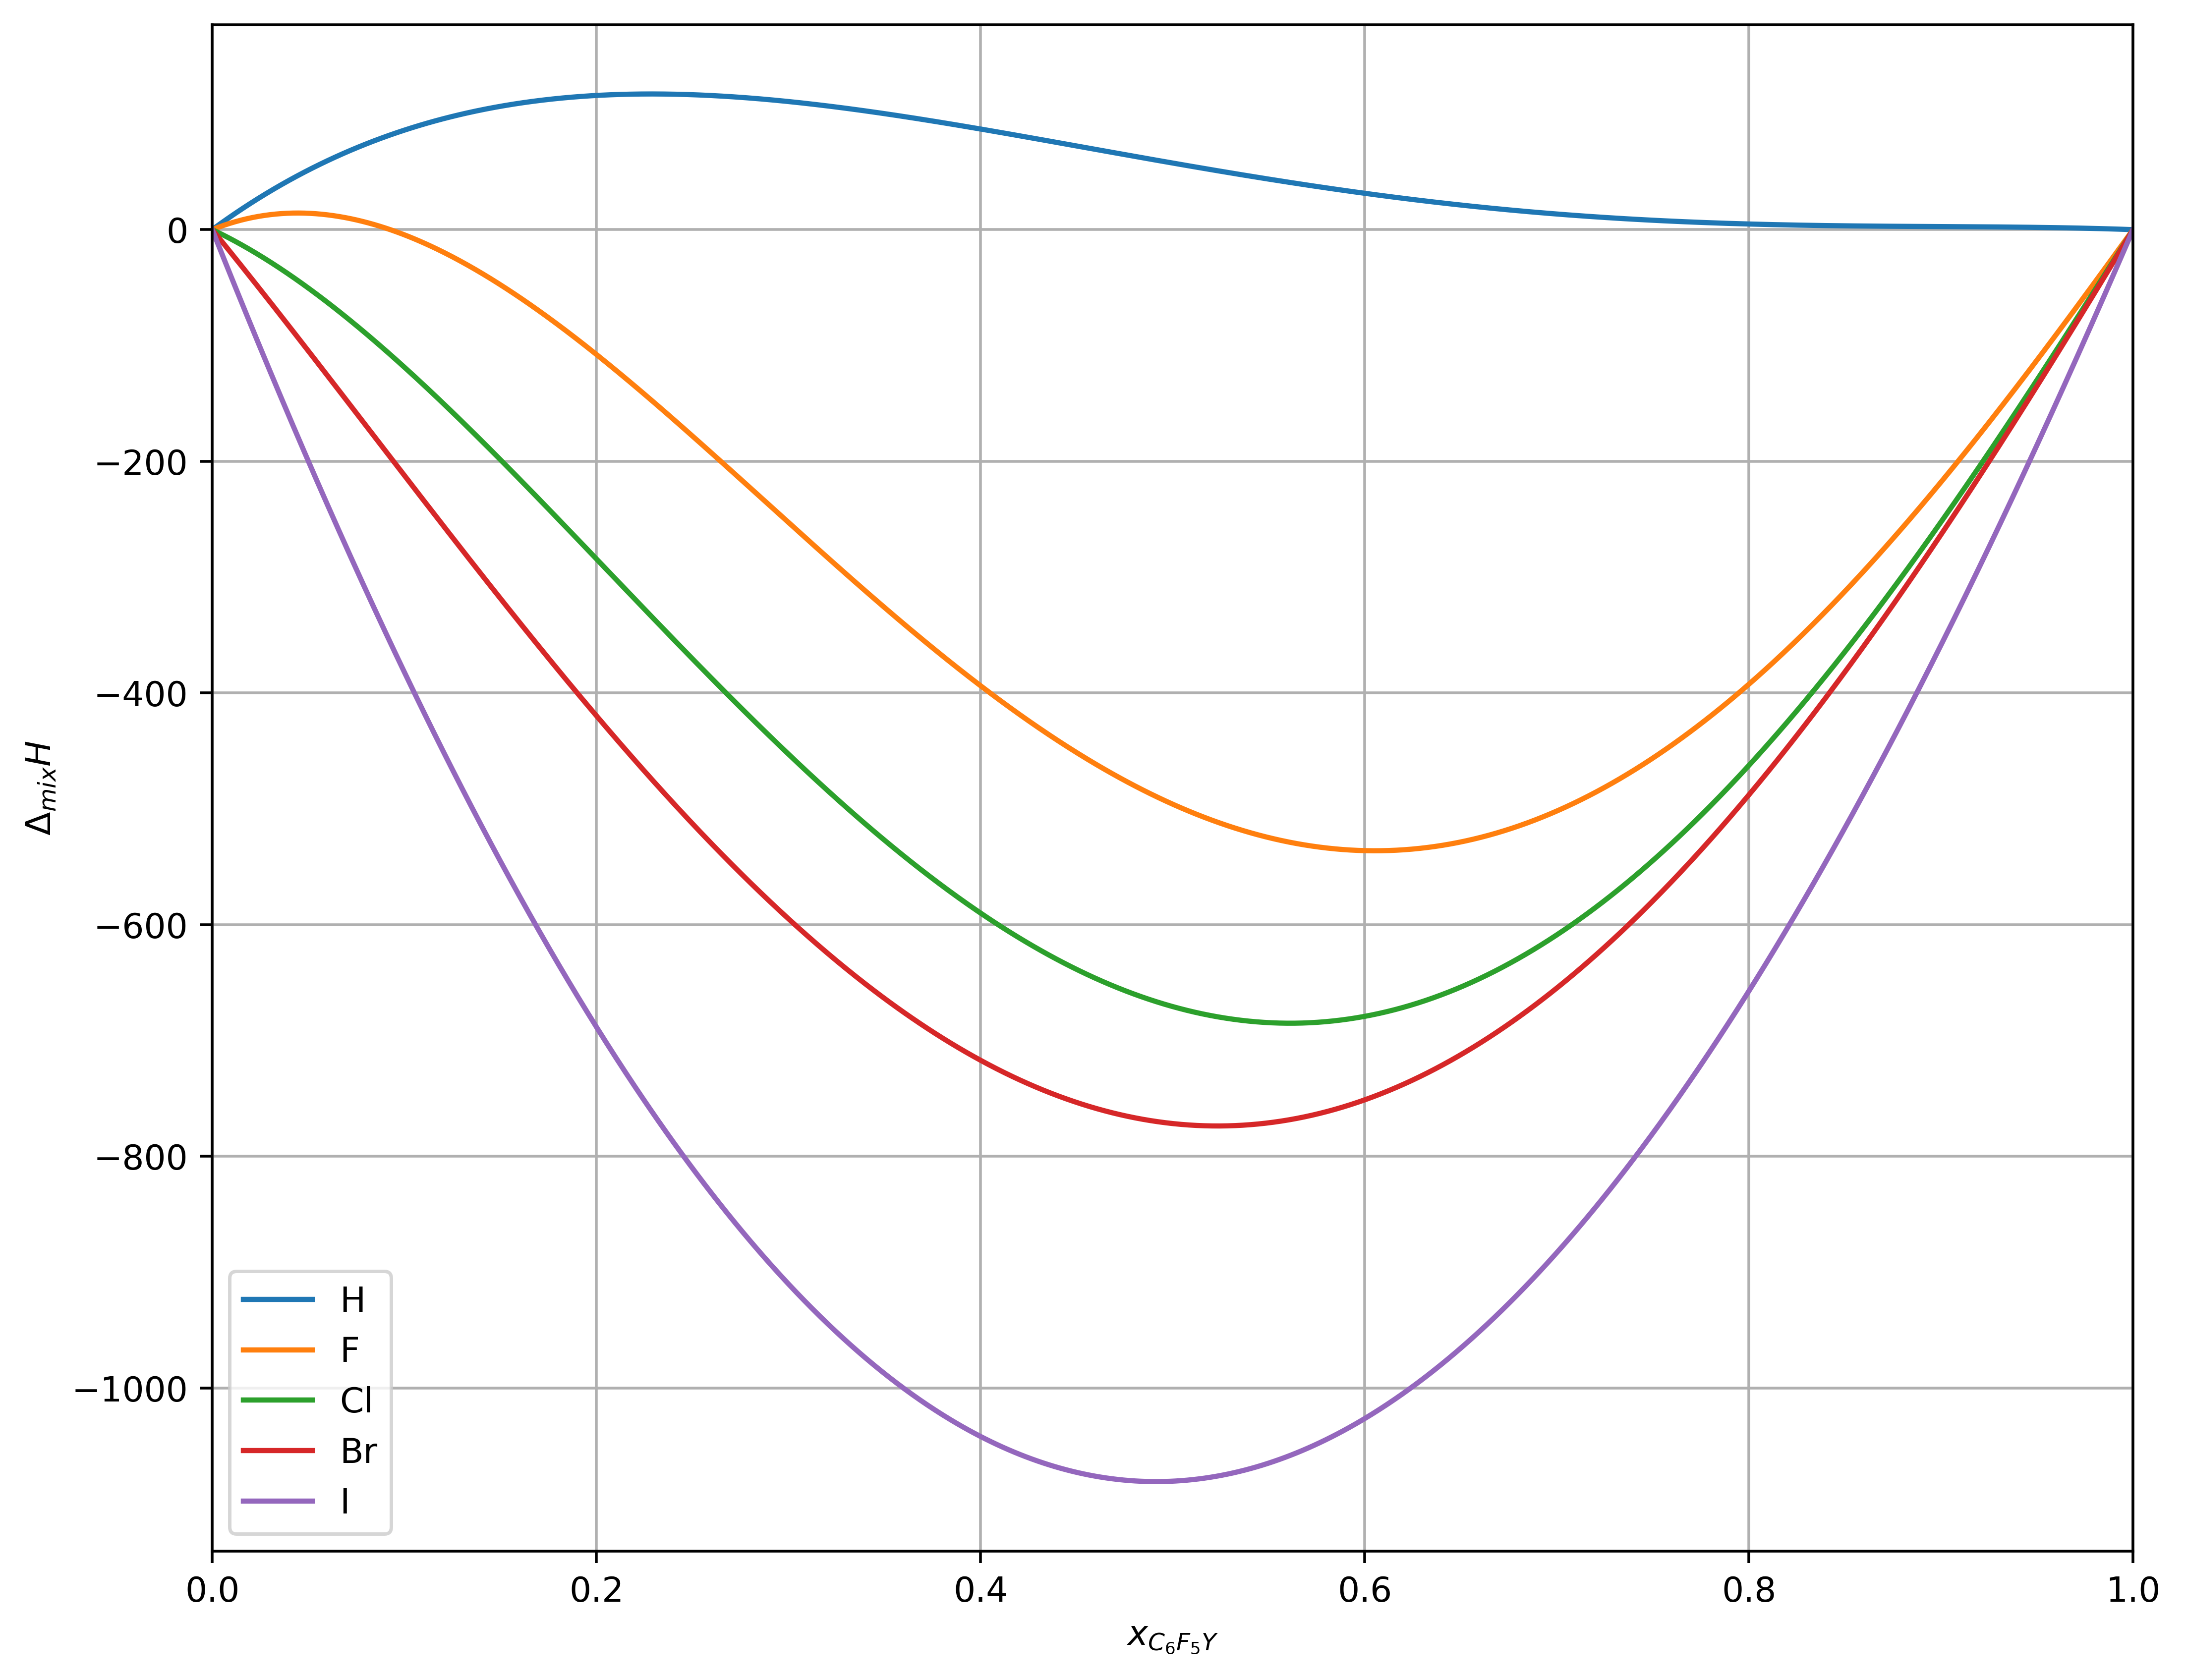

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def DeltaH_mix(x2, params):
    h0, h1, h2 = params
    return x2 * (1 - x2) * (h0 + h1 * (1 - 2*x2) + h2 * (1 - 2*x2)**2)

params_dict = {
    'H': (230, 578, 409),
    'F': (-1984, 1483, 1169),
    'Cl': (-2683, 929, 970),
    'Br': (-3087, 356, 696),
    'I': (-4322, -161, 324)
}

fig, ax = plt.subplots(figsize=(10,8), dpi=500)
for name in  params_dict.keys():
    x = np.linspace(0,1,1000)
    y = DeltaH_mix(x, params_dict[name])
    ax.plot(x, y, label=name)
ax.legend()
ax.grid()
ax.set(xlim=(0,1), xlabel='$x_{C_6F_5Y}$', ylabel='$\Delta_{mix} {H}$');

the derivative of the equations the paper provides are in this form
$$
\frac{d}{dx_2} \Delta H_{\text{mix}} = (1 - 2x_2) (h_0 + h_1(1 - 2x_2) + h_2(1 - 2x_2)^2) + x_2 (1 - x_2) (-2 h_1 - 4 h_2 (1 - 2x_2))
$$

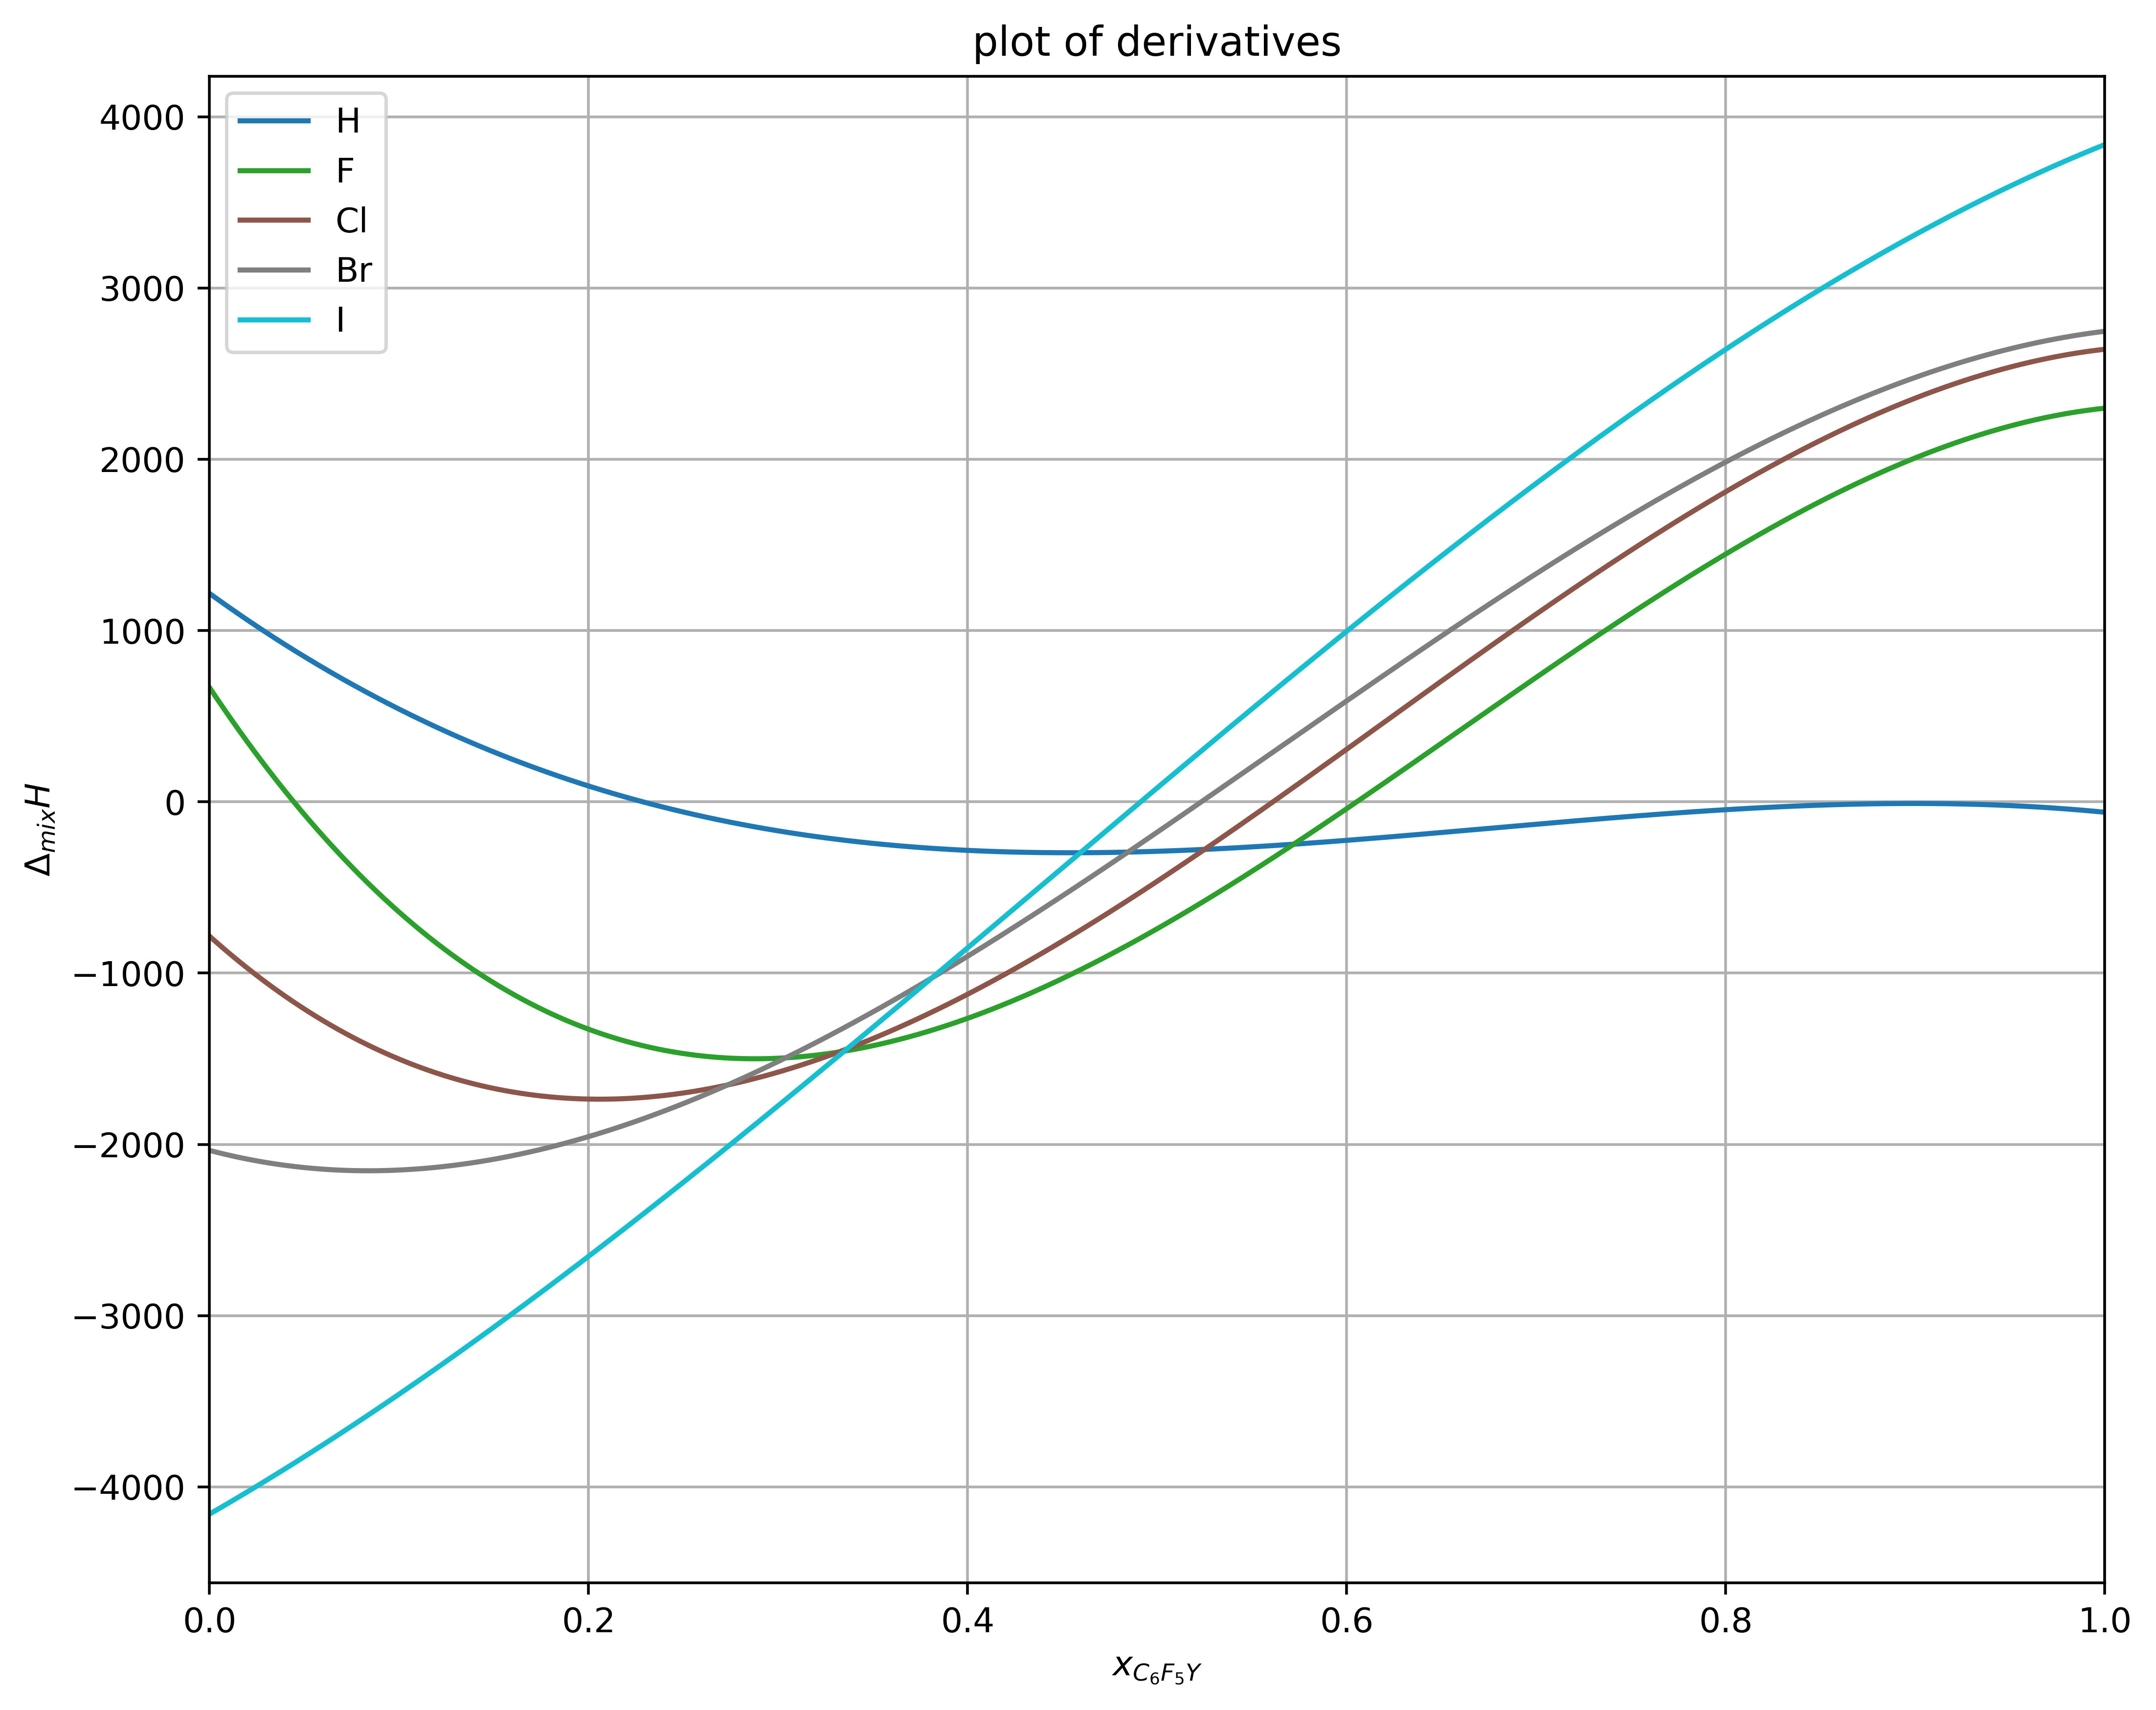

In [9]:
def d_DeltaH_mix(x2, params):
    h0, h1, h2 = params
    term1 = (1 - 2*x2) * (h0 + h1 * (1 - 2*x2) + h2 * (1 - 2*x2)**2)
    term2 = x2 * (1 - x2) * (-2 * h1 - 4 * h2 * (1 - 2*x2))
    return term1 + term2

fig, ax = plt.subplots(figsize=(10,8), dpi=500)
colors = plt.cm.tab10(np.linspace(0, 1, 5))

for color, name in zip(colors, params_dict.keys()):
    x = np.linspace(0,1,1000)
    y = d_DeltaH_mix(x, params_dict[name])
    ax.plot(x, y, label=name, color=color)
ax.legend()
ax.grid()
ax.set(xlim=(0,1), xlabel='$x_{C_6F_5Y}$', ylabel='$\Delta_{mix} {H}$', title='plot of derivatives');

Now we can do all the calculations needed for this problem by evaluating the derivatives at the desired points and use this equation
$$
\bar{H}_{C_6H_6} - \underline{H}_{C_6H_6} = \Delta_{\text{mix}} \underline{H} - x_{C_6F_6Y} \frac{\partial \Delta_{\text{mix}} \underline{H}}{\partial x_{C_6F_6Y}}
$$
and then this equation for $C_6F_5Y$

In [10]:
def differences(x, params: tuple):
    '''
    returns the difference between the partial molar properties and molar properties
    inputs:
        - x: mole fraction C6F5Y (float or nparray)
        - params: the h0, h1, h2 fit parameters (tuple)
    returns:
        - (1) difference for benzene
        - (2) difference for the C6F5Y
    '''
    h0, h1, h2 = params
    derivative = d_DeltaH_mix(x, (h0, h1, h2))
    delta_mix = DeltaH_mix(x, (h0, h1, h2))
    return (delta_mix - x * derivative, delta_mix + (1 - x) * derivative)

composition = 0.333
benzenes, c6f5ys = [], []
for mixture, params in zip(['H', 'F', 'Cl', 'Br', 'I'], params_dict.keys()):
    diff_benzene, diff_c6f5 = differences(composition, params_dict[params])
    benzenes.append(diff_benzene)
    c6f5ys.append(diff_c6f5)

df = pd.DataFrame({'composition':composition,
                   'Y':['H', 'F', 'Cl', 'Br', 'I'],
                   'benzene difference': benzenes,
                   'C6F5Y difference':c6f5ys})

composition = 0.667
benzenes, c6f5ys = [], []
for mixture, params in zip(['H', 'F', 'Cl', 'Br', 'I'], params_dict.keys()):
    diff_benzene, diff_c6f5 = differences(composition, params_dict[params])
    benzenes.append(diff_benzene)
    c6f5ys.append(diff_c6f5)

df2 = pd.DataFrame({'composition':composition,
                   'Y':['H', 'F', 'Cl', 'Br', 'I'],
                   'benzene difference': benzenes,
                   'C6F5Y difference':c6f5ys})

df = pd.concat([df, df2])

### benzene differences !!

In [11]:
df.pivot(index='composition', columns='Y')['benzene difference']

Y,Br,Cl,F,H,I
composition,,,,,
0.333,-199.082911,-17.835391,184.271225,177.887603,-473.017385
0.667,-1424.003857,-1200.267830,-836.973728,127.043932,-1994.638285


### $C_6F_5Y$ differences !!

In [12]:
df.pivot(index='composition', columns='Y')['C6F5Y difference']

Y,Br,Cl,F,H,I
composition,,,,,
0.333,-1529.168499,-1474.700279,-1275.061265,-43.700907,-1947.077871
0.667,-330.776461,-361.496370,-364.328594,-35.929454,-413.459347


In [13]:
# this is filler text. ignore please.